# Plotting and comparing the absolute current velocity around each reef site, and the regional absolute velocity for an el nino year and a la nina year

In [7]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean as cmo
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
%matplotlib inline  
plt.rcParams['figure.figsize'] = (6,5)

## Loading in 12 months worth of data
dataset contains 12 months of ocean w data which represents average velocity/current speed

In [8]:
month1_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2010_10.nc'
month2_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2010_11.nc'
month3_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2010_12.nc'
month4_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_01.nc'
month5_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_02.nc'
month6_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_03.nc'
month7_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_04.nc'
month8_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_05.nc'
month9_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_06.nc'
month10_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_07.nc'
month11_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_08.nc'
month12_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_w_2011_09.nc'

ds_oct = xr.open_dataset(month1_files)
ds_nov = xr.open_dataset(month2_files)
ds_dec = xr.open_dataset(month3_files)
ds_jan = xr.open_dataset(month4_files)
ds_feb = xr.open_dataset(month5_files)
ds_mar = xr.open_dataset(month6_files)
ds_apr = xr.open_dataset(month7_files)
ds_may = xr.open_dataset(month8_files)
ds_jun = xr.open_dataset(month9_files)
ds_jul = xr.open_dataset(month10_files)
ds_aug = xr.open_dataset(month11_files)
ds_sep = xr.open_dataset(month12_files)

# Domain
x0,x1 = 115,123
y0,y1 = -21, -13
# Subset an xarray.DataArray
# Here I changed sw_ocean to 5 because this is the closest one to 0.5 that you initially put
my_oct = ds_oct['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_nov = ds_nov['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_dec = ds_dec['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_jan = ds_jan['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_feb = ds_feb['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_mar = ds_mar['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_apr = ds_apr['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_may = ds_may['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_jun = ds_jun['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_jul = ds_jul['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_aug = ds_aug['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)
my_sep = ds_sep['w'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), sw_ocean=5)




### compressing 12 months worth of data into one .nc file to make it easier to work with so much data, and so that the kernel can handle all the data.

In [9]:
my_oct.to_netcdf('w_2010_2011_1.nc')
my_nov.to_netcdf('w_2010_2011_2.nc')
my_dec.to_netcdf('w_2010_2011_3.nc')
my_jan.to_netcdf('w_2010_2011_4.nc')
my_feb.to_netcdf('w_2010_2011_5.nc')
my_mar.to_netcdf('w_2010_2011_6.nc')
my_apr.to_netcdf('w_2010_2011_7.nc')
my_may.to_netcdf('w_2010_2011_8.nc')
my_jun.to_netcdf('w_2010_2011_9.nc')
my_jul.to_netcdf('w_2010_2011_10.nc')
my_aug.to_netcdf('w_2010_2011_11.nc')
my_sep.to_netcdf('w_2010_2011_12.nc')

In [10]:
alldata = xr.open_mfdataset('w_2010_2011_*.nc')

In [11]:
alldata['absw'] = np.fabs(alldata['w'])

In [12]:
alldata.to_netcdf('w_2010_2011.nc')

In [7]:
speed_2010 = xr.open_dataset('w_2010_2011.nc')

#### checking the dimensions of the data

In [8]:
speed_2010

<xarray.Dataset>
Dimensions:   (xt_ocean: 90, yt_ocean: 80, Time: 365)
Coordinates:
  * xt_ocean  (xt_ocean) float64 145.1 145.1 145.2 145.4 ... 153.8 153.9 153.9
  * yt_ocean  (yt_ocean) float64 -19.95 -19.85 -19.75 ... -12.25 -12.15 -12.05
    sw_ocean  float64 ...
  * Time      (Time) datetime64[ns] 2010-10-01T12:00:00 ... 2011-09-30T12:00:00
Data variables:
    w         (Time, yt_ocean, xt_ocean) float32 ...
    absw      (Time, yt_ocean, xt_ocean) float32 ...

### Adding a specific reefs coordinates to calculate the mean absuolute velocity of the current surrounding that reef,
These coordiantes can be changed for each reef location to be plotted seperately.

In [9]:
reef_lat = 150.00
reef_lon = -16.94

In [10]:
speed_2010

<xarray.Dataset>
Dimensions:   (xt_ocean: 90, yt_ocean: 80, Time: 365)
Coordinates:
  * xt_ocean  (xt_ocean) float64 145.1 145.1 145.2 145.4 ... 153.8 153.9 153.9
  * yt_ocean  (yt_ocean) float64 -19.95 -19.85 -19.75 ... -12.25 -12.15 -12.05
    sw_ocean  float64 5.0
  * Time      (Time) datetime64[ns] 2010-10-01T12:00:00 ... 2011-09-30T12:00:00
Data variables:
    w         (Time, yt_ocean, xt_ocean) float32 ...
    absw      (Time, yt_ocean, xt_ocean) float32 ...


### gathering the mean absolute velocity for each specific reef

In [11]:
meanspeed_2010 = speed_2010.sel(xt_ocean=reef_lon, yt_ocean=reef_lat, method='nearest')
meanspeed_2010

<xarray.Dataset>
Dimensions:   (Time: 365)
Coordinates:
    xt_ocean  float64 145.1
    yt_ocean  float64 -12.05
    sw_ocean  float64 5.0
  * Time      (Time) datetime64[ns] 2010-10-01T12:00:00 ... 2011-09-30T12:00:00
Data variables:
    w         (Time) float32 ...
    absw      (Time) float32 ...

In [12]:
speed_2010.sw_ocean.values

array(5.)

In [13]:
speed_2010

<xarray.Dataset>
Dimensions:   (xt_ocean: 90, yt_ocean: 80, Time: 365)
Coordinates:
  * xt_ocean  (xt_ocean) float64 145.1 145.1 145.2 145.4 ... 153.8 153.9 153.9
  * yt_ocean  (yt_ocean) float64 -19.95 -19.85 -19.75 ... -12.25 -12.15 -12.05
    sw_ocean  float64 5.0
  * Time      (Time) datetime64[ns] 2010-10-01T12:00:00 ... 2011-09-30T12:00:00
Data variables:
    w         (Time, yt_ocean, xt_ocean) float32 ...
    absw      (Time, yt_ocean, xt_ocean) float32 ...

### creating a rolling average for the chosen reef site

In [14]:
speed_2010_rolling = speed_2010.rolling(Time=2, center=True).mean()

In [15]:
speed_2010_rolling_region = speed_2010_rolling.mean(dim=['xt_ocean','yt_ocean'])

In [16]:
meanspeed_2010

<xarray.Dataset>
Dimensions:   (Time: 365)
Coordinates:
    xt_ocean  float64 145.1
    yt_ocean  float64 -12.05
    sw_ocean  float64 5.0
  * Time      (Time) datetime64[ns] 2010-10-01T12:00:00 ... 2011-09-30T12:00:00
Data variables:
    w         (Time) float32 -1.471e-07 7.451e-07 ... -7.57e-06 -5.931e-06
    absw      (Time) float32 1.471e-07 7.451e-07 ... 7.57e-06 5.931e-06

## Plotting the current speed rolling average over the entire year for each reef, with the rolling average of the region as a comparison, for the specific weather event year - La nina and El nino.
in this case, there is a comparison between the absolute current velocity in the region and at Coringa Reef during a Lanina year.

<Figure size 1000x600 with 0 Axes>

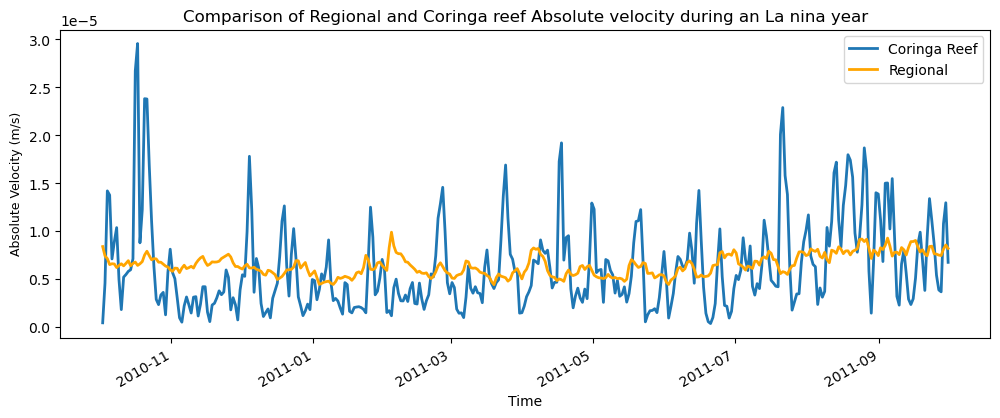

In [17]:
fig=plt.figure(figsize=(10,6))
speed_2010_rolling.absw.sel(xt_ocean=reef_lon,yt_ocean=reef_lat,method='nearest').plot(lw=2,c='tab:blue',figsize=(12,4),label='Coringa Reef')
speed_2010_rolling_region.absw.plot(lw=2,c='orange',label='Regional')
plt.ylabel('Absolute Velocity (m/s)', fontsize=9)
plt.legend()

plt.title('Comparison of Regional and Coringa reef Absolute velocity during a year with no weather event')
fig.tight_layout

plt.savefig('coringareefvelocitybaseline')